## Clustering on Marketing

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/clusmarke.png' width=1000>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Mall_Customers.csv

In [2]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Mall_Customers.csv'

In [3]:
df = pd.read_csv(path)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


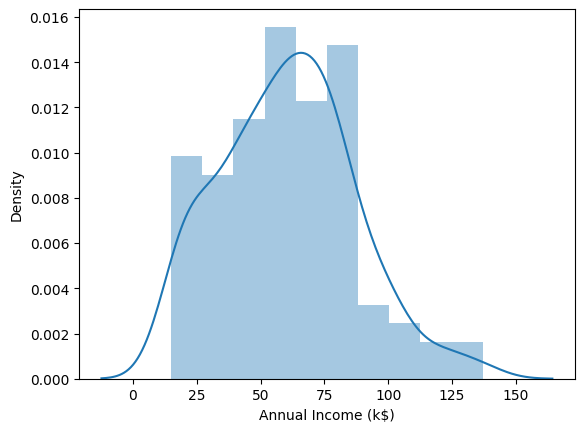

In [5]:
import seaborn as sns

sns.distplot(df['Annual Income (k$)']);

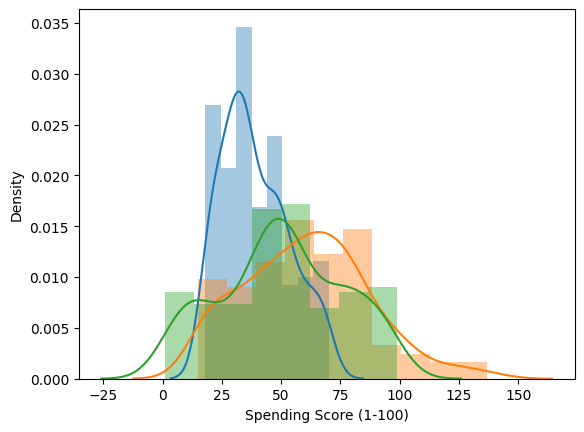

In [6]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    sns.distplot(df[i])

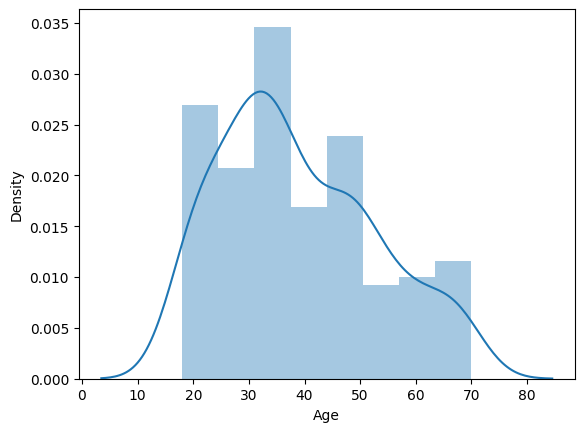

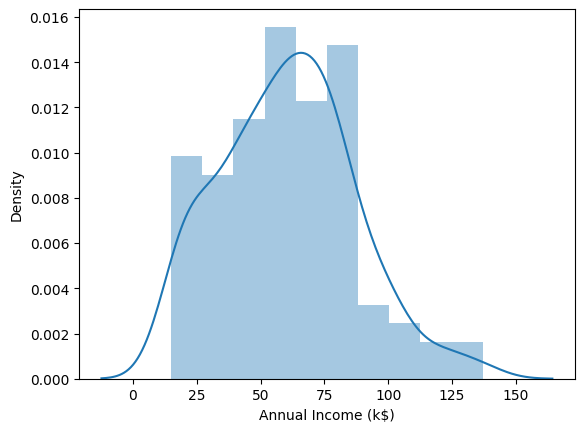

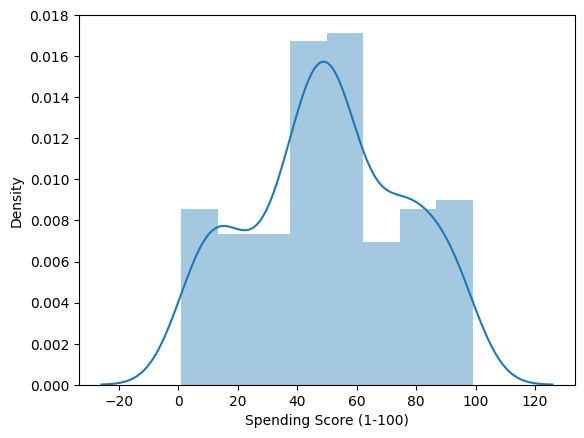

In [7]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.distplot(df[i])

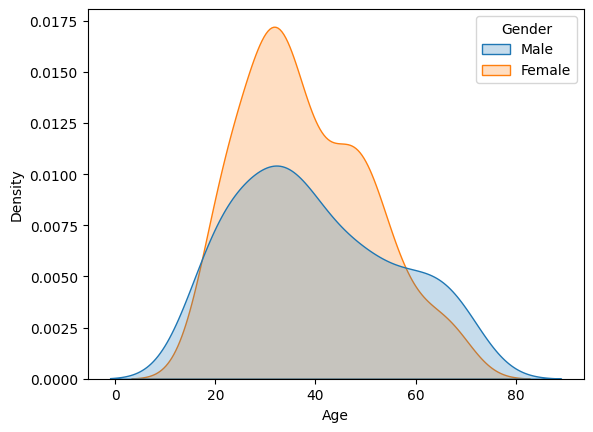

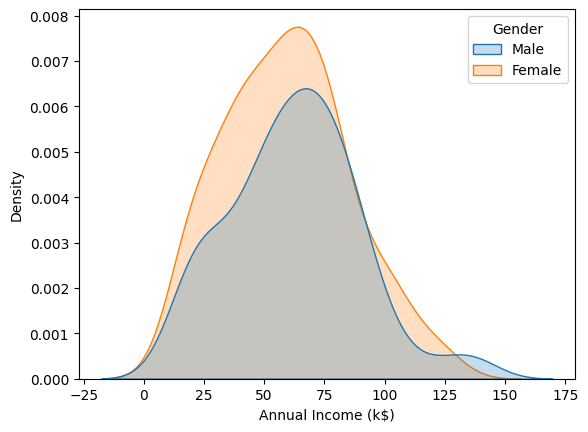

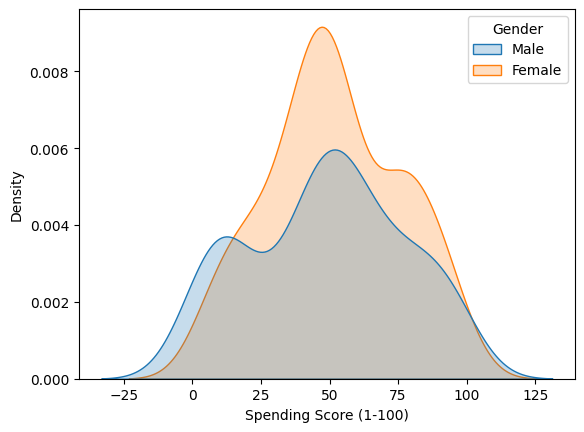

In [8]:
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=df[i], hue="Gender",shade=True)

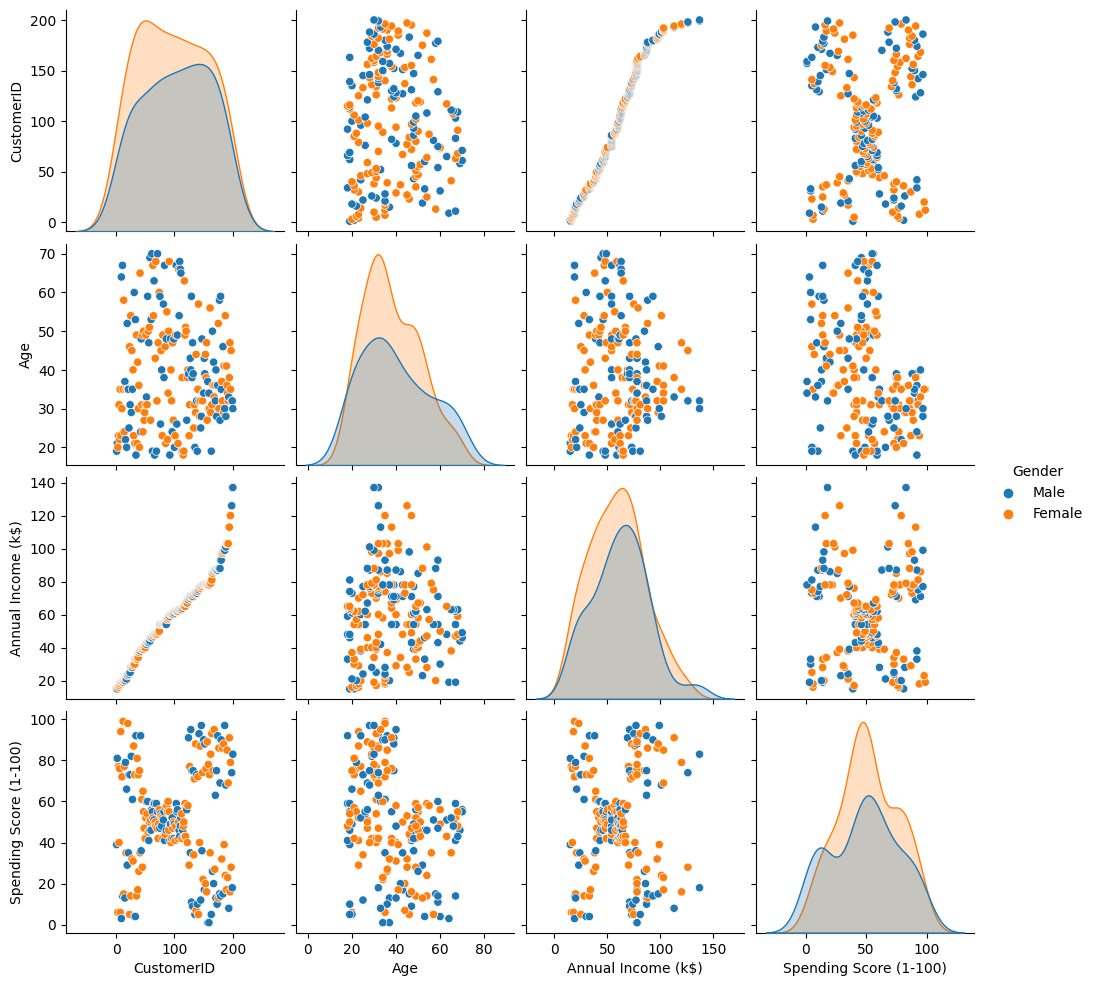

In [9]:
sns.pairplot(df,hue='Gender')

In [10]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot: >

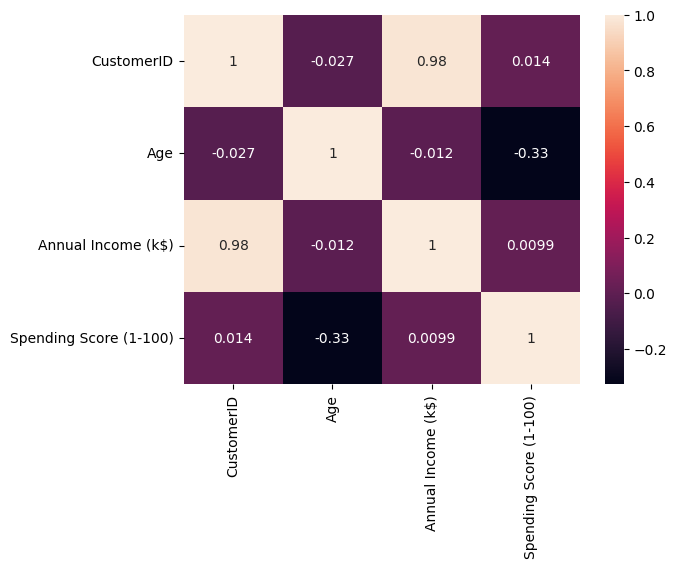

In [11]:
sns.heatmap(df.corr(),annot=True)

#### La correlazione non ci aiuta... sono tutte vicine allo zero

### Clustering

In [12]:
from sklearn.cluster import KMeans

clustering1 = KMeans()

In [13]:
## Univariate 1 feature
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

In [14]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4,
       4, 4])

In [15]:
df['IncomeClusters']=clustering1.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeClusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,4
197,198,Male,32,126,74,4
198,199,Male,32,137,18,4


In [16]:
df['IncomeClusters'].value_counts()

5    42
2    36
3    30
0    30
7    26
1    16
6    14
4     6
Name: IncomeClusters, dtype: int64

In [17]:
clustering1.inertia_

2836.339987789988

## Elbow method - Clustering su 1 variabile "Annual Income (k$)"
(parto sempre da una variabile e poi le aggiungo)

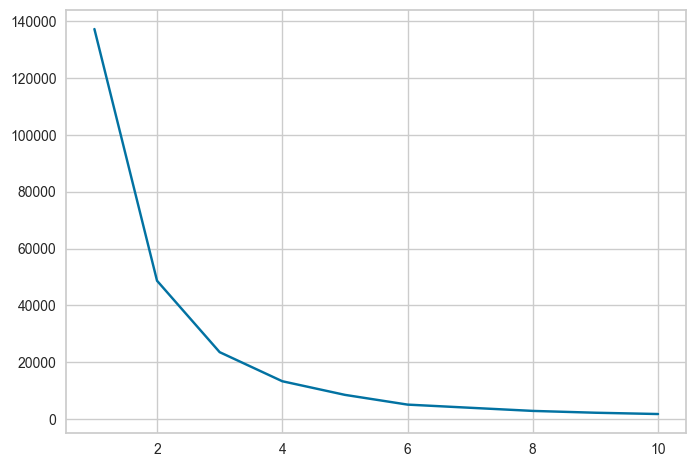

In [38]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

plt.plot(range(1,11), inertia_scores)

## Verify the Silhouette

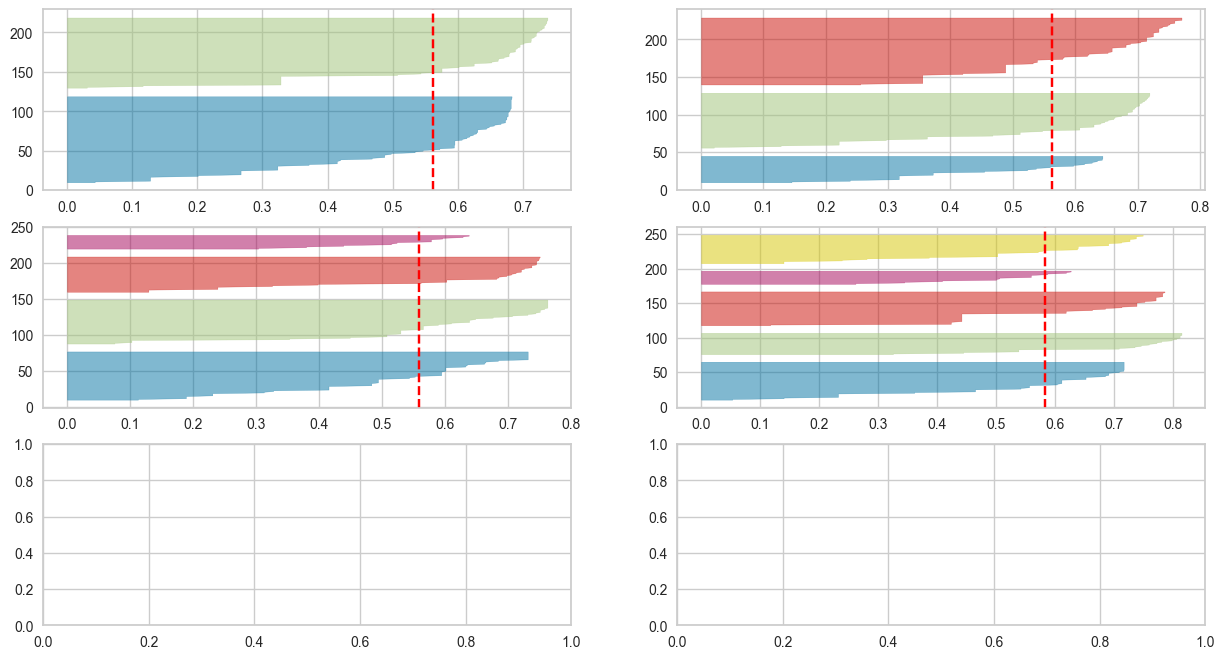

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer

X = df[['Annual Income (k$)']]
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

## Dendogramma

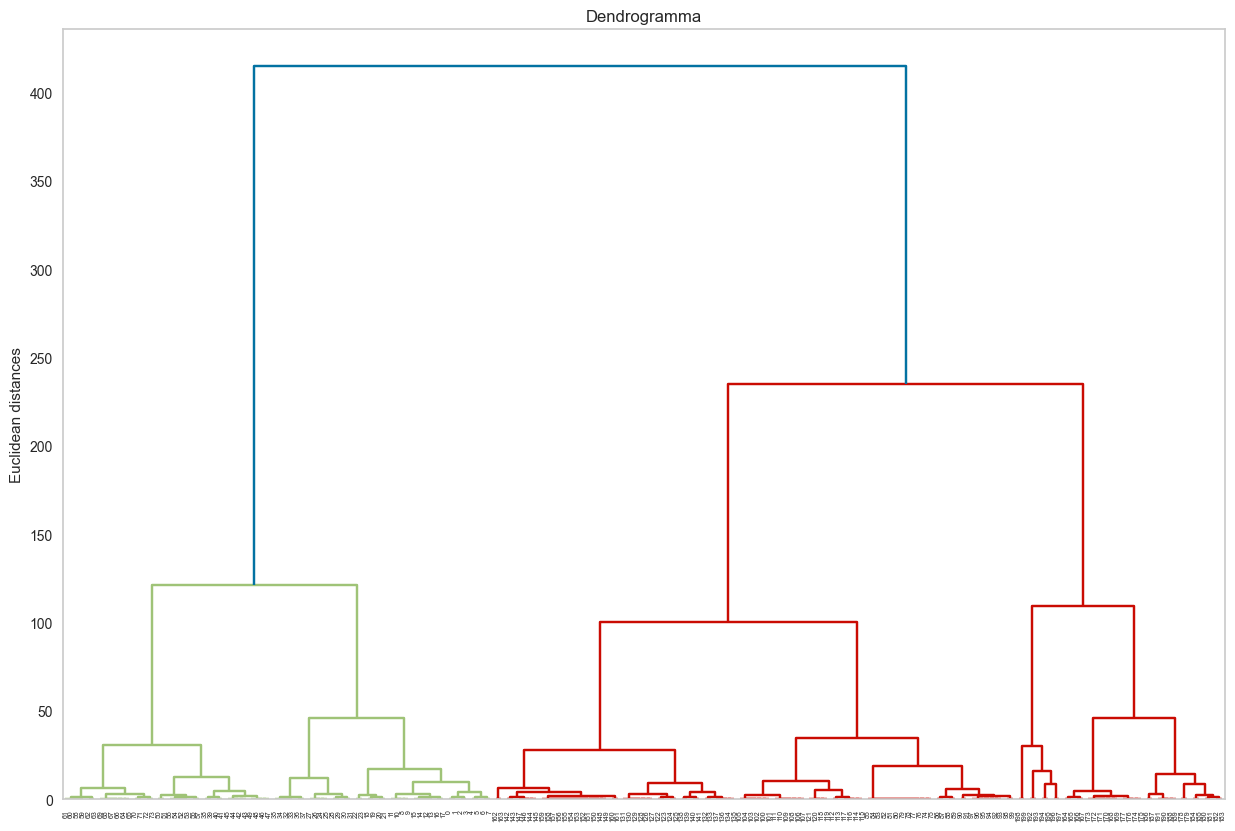

In [40]:
import scipy.cluster.hierarchy as ch

plt.figure(figsize=(15,10))
plt.title('Dendrogramma')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.show()

In [41]:
# aggiorno il numero di cluster==3
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])
df['IncomeClusters']=clustering1.labels_
df['IncomeClusters'].value_counts()

0    92
2    72
1    36
Name: IncomeClusters, dtype: int64

In [42]:
df.groupby('IncomeClusters')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
IncomeClusters,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


Annual Income (k$)

## Elbow method - Clustering su 2 variabili 'Annual Income (k$)','Spending Score (1-100)'

In [43]:
## Bivariate 2 features
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending&IncomeCluster'] = clustering2.labels_
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeClusters,Spending&IncomeCluster
0,1,Male,19,15,39,2,5
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,5
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,5
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,4
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,4


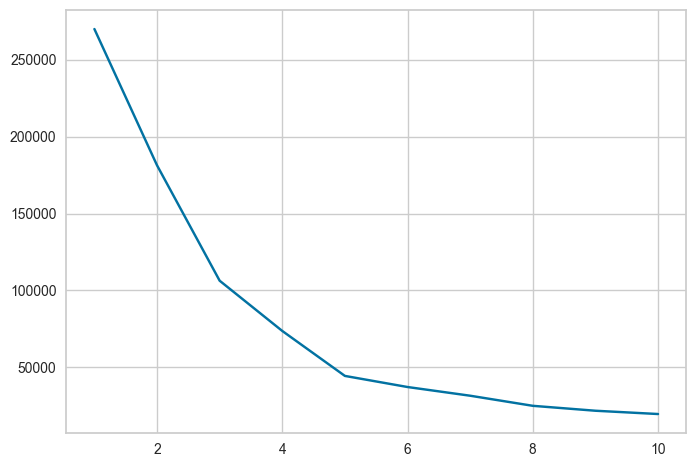

In [44]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11), inertia_scores2)

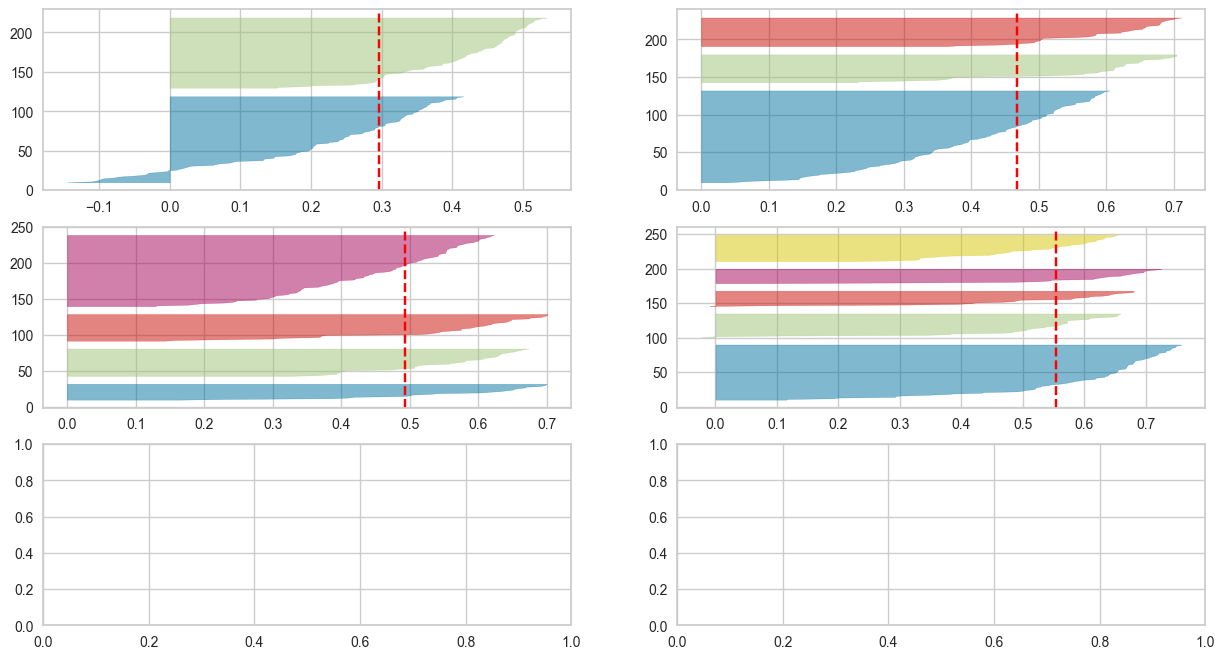

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer

X = df[['Annual Income (k$)','Spending Score (1-100)']]
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

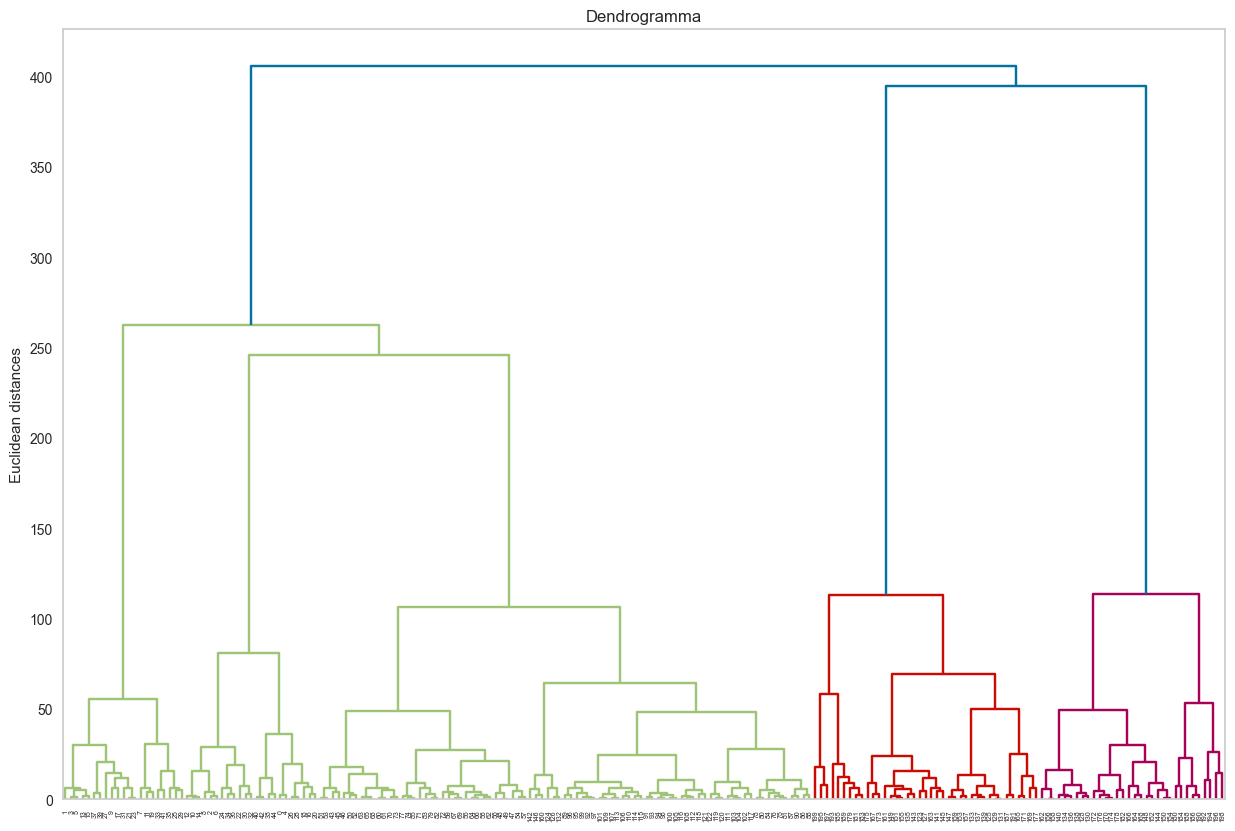

In [46]:
import scipy.cluster.hierarchy as ch

plt.figure(figsize=(15,10))
plt.title('Dendrogramma')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.show()

In [47]:
# aggiorno il numero di cluster==5
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending&IncomeCluster']=clustering2.labels_
df['Spending&IncomeCluster'].value_counts()

3    81
1    39
0    35
2    23
4    22
Name: Spending&IncomeCluster, dtype: int64

In [48]:
centers = pd.DataFrame(clustering2.cluster_centers_,columns=['x','y'])
centers

,x,y
0,88.200000,17.114286
1,86.538462,82.128205
2,26.304348,20.913043
3,55.296296,49.518519
4,25.727273,79.363636


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

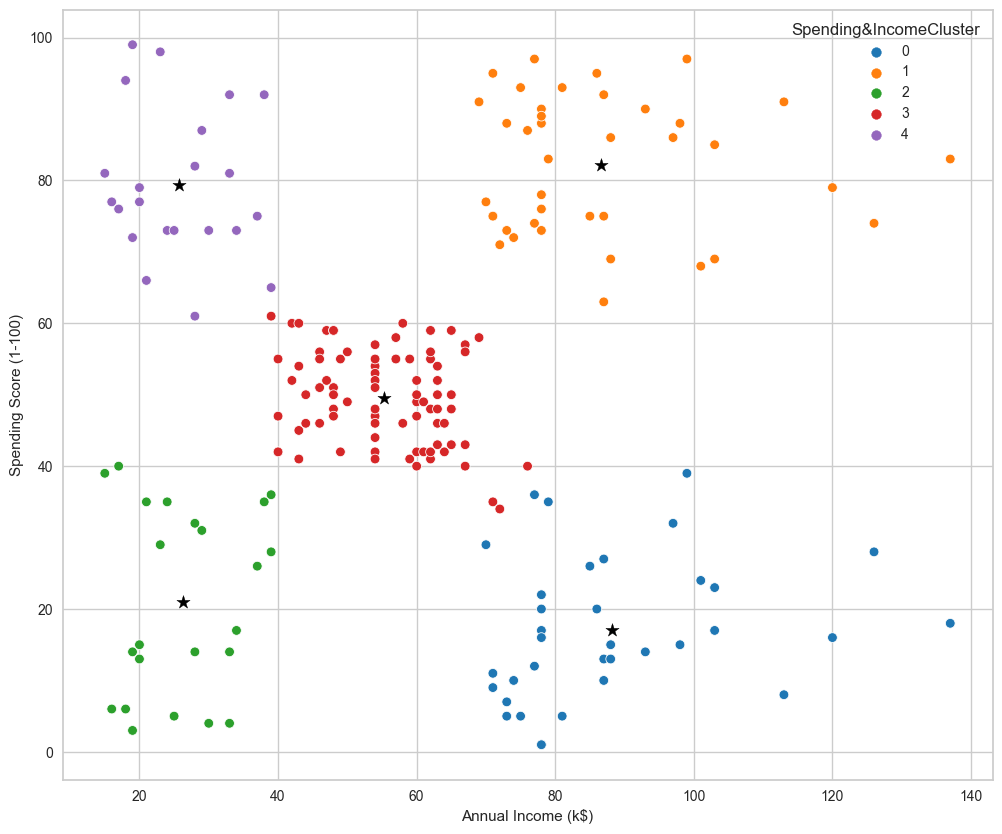

In [49]:
plt.figure(figsize=(12,10))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data= df,x='Annual Income (k$)',y='Spending Score (1-100)',
                hue='Spending&IncomeCluster',palette='tab10')

In [50]:
pd.crosstab(df['Spending&IncomeCluster'],df['Gender'])

Gender,Female,Male
Spending&IncomeCluster,,
0,16,19
1,21,18
2,14,9
3,48,33
4,13,9


In [51]:
pd.crosstab(df['Spending&IncomeCluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending&IncomeCluster,,
0,0.457143,0.542857
1,0.538462,0.461538
2,0.608696,0.391304
3,0.592593,0.407407
4,0.590909,0.409091


In [52]:
dfd =pd.get_dummies(df,drop_first=True)
dfd

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),IncomeClusters,Spending&IncomeCluster,Gender_Male
0,1,19,15,39,2,2,1
1,2,21,15,81,2,4,1
2,3,20,16,6,2,2,0
3,4,23,16,77,2,4,0
4,5,31,17,40,2,2,0
...,...,...,...,...,...,...,...
195,196,35,120,79,1,1,0
196,197,45,126,28,1,0,0
197,198,32,126,74,1,1,1
198,199,32,137,18,1,0,1


In [53]:
dfd.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'IncomeClusters', 'Spending&IncomeCluster', 'Gender_Male'],
      dtype='object')

## Clustering su tutte le variabili

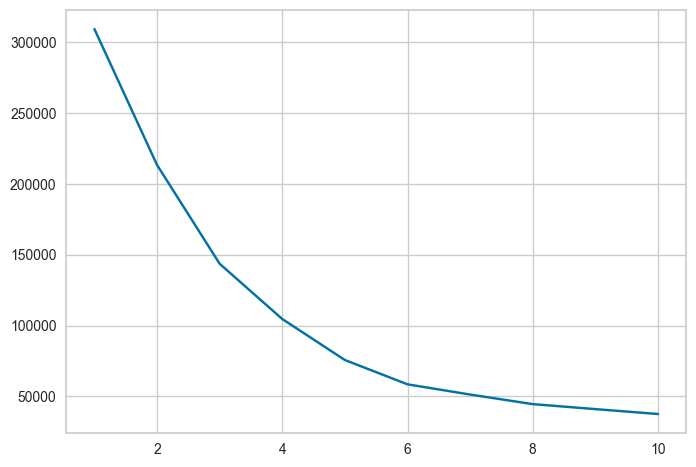

In [54]:
## Multivariate 6 features
clustering3 = KMeans()
clustering3.fit(dfd[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','IncomeClusters', 'Spending&IncomeCluster', 'Gender_Male']])

inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dfd[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','IncomeClusters', 'Spending&IncomeCluster', 'Gender_Male']])
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1,11), inertia_scores3)

# the result here are much worst

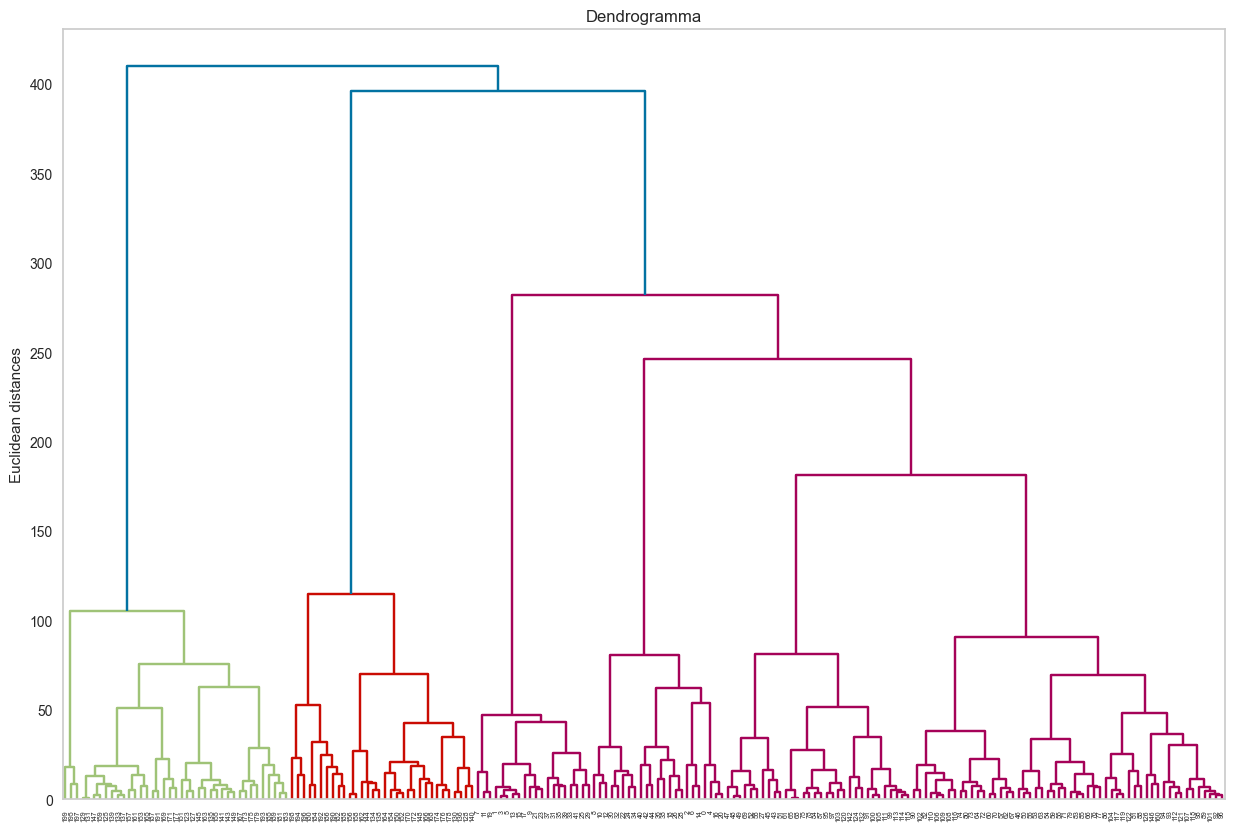

In [55]:
X = dfd[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','IncomeClusters', 'Spending&IncomeCluster', 'Gender_Male']]
import scipy.cluster.hierarchy as ch

plt.figure(figsize=(15,10))
plt.title('Dendrogramma')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.show()